# Car sales price prediction

**Author:** Mariana Khachatryan
**Email:** marishnem@gmail.com
**Date:** 2024-12-12

In [546]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,r2_score

In [547]:
#I have defined the dat class in Data_prep.py code to get data from file and prepare for analysis
from Data_prep import dat

In [548]:
#In this analysis we are using the following data https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho
#we are trying to predict car prices based on different features
df=pd.read_csv("Car_details_v3_cleaned.csv",index_col=0)

In [549]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6267 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          6267 non-null   int64  
 1   selling_price                 6267 non-null   int64  
 2   km_driven                     6267 non-null   int64  
 3   mileage                       6267 non-null   float64
 4   engine                        6267 non-null   float64
 5   max_power                     6267 non-null   float64
 6   fuel_Petrol                   6267 non-null   bool   
 7   seller_type_Individual        6267 non-null   bool   
 8   transmission_Manual           6267 non-null   bool   
 9   owner_Second Owner            6267 non-null   bool   
 10  owner_Third and above owners  6267 non-null   bool   
 11  seat_category_more than 5     6267 non-null   bool   
dtypes: bool(6), float64(3), int64(3)
memory usage: 379.4 KB


In [550]:
df=df.astype(float)

In [551]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,fuel_Petrol,seller_type_Individual,transmission_Manual,owner_Second Owner,owner_Third and above owners,seat_category_more than 5
count,6267.000000,6.267000e+03,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000
mean,2013.599968,4.504369e+05,73702.630445,19.699196,1399.672730,84.586747,0.459550,0.908409,0.938886,0.284666,0.097974,0.191320
std,3.679598,2.541364e+05,47875.436535,3.831312,460.545875,25.625692,0.498401,0.288471,0.239558,0.451291,0.297303,0.393371
min,2001.000000,3.000000e+04,1000.000000,9.000000,624.000000,34.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,2.500000e+05,40000.000000,17.000000,1197.000000,68.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,2014.000000,4.000000e+05,70000.000000,19.700000,1248.000000,81.800000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2017.000000,6.050000e+05,100000.000000,22.540000,1498.000000,98.600000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,2020.000000,1.295000e+06,475000.000000,28.400000,3498.000000,272.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [552]:
df_corr=df.corr()
df_corr["selling_price"].nsmallest(1)

fuel_Petrol   -0.322558
Name: selling_price, dtype: float64

In [553]:
df_corr["selling_price"].nlargest(2)

selling_price    1.000000
year             0.629347
Name: selling_price, dtype: float64

<Axes: xlabel='max_power', ylabel='selling_price'>

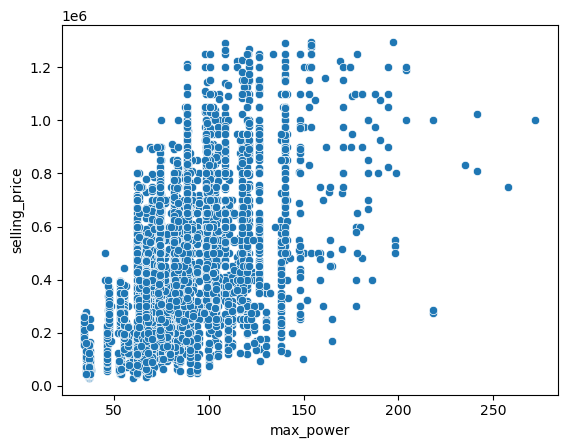

In [554]:
#The highest correlation of "selling_price" is with "max_power" feature
sns.scatterplot(data=df,y="selling_price",x="max_power")

C:\Users\17573\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


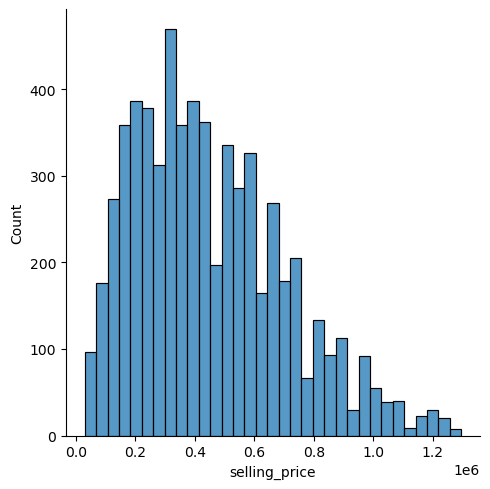

In [555]:
sns.displot(data=df,x="selling_price")

In [556]:
X=df.drop("selling_price",axis=1)
y=df["selling_price"]

In [557]:
# Step 1: Split into training (60%) and temporary set (40%)
X_train_notscaled, X_temp_notscaled, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Step 2: Split temporary set into validation (50% of temp, i.e., 20% of original) and test (50% of temp)
X_val_notscaled, X_test_notscaled, y_val, y_test = train_test_split(X_temp_notscaled, y_temp, test_size=0.5, random_state=42)

In [558]:
# Step 2: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_notscaled)
X_val = scaler.transform(X_val_notscaled)
X_test = scaler.transform(X_test_notscaled)

In [559]:
X_test

array([[-0.71763359,  3.69998092, -1.80529921, ...,  1.57220784,
        -0.32289076,  1.99833928],
       [ 0.3698434 ,  0.97407581,  1.04663686, ..., -0.63604822,
        -0.32289076, -0.50041552],
       [ 0.09797416,  0.579868  , -1.14451698, ...,  1.57220784,
        -0.32289076,  1.99833928],
       ...,
       [ 1.18545115, -0.91308926,  0.5285836 , ..., -0.63604822,
        -0.32289076, -0.50041552],
       [ 0.3698434 ,  1.30957182, -0.16391617, ..., -0.63604822,
        -0.32289076, -0.50041552],
       [-0.17389509, -0.07434923, -1.19737956, ...,  1.57220784,
        -0.32289076,  1.99833928]])

In [560]:
#In order not to have the label in a very different scale than features, we will scale labels by dividing by 10^5
units=100000
y_train=y_train/units
y_val=y_val/units
y_test=y_test/units

In [561]:
y_train

27      3.00
2931    5.15
1376    9.50
4160    0.50
1903    6.60
        ... 
4836    2.40
6675    6.10
6734    5.50
6935    2.82
1014    9.00
Name: selling_price, Length: 3760, dtype: float64

In [562]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,fuel_Petrol,seller_type_Individual,transmission_Manual,owner_Second Owner,owner_Third and above owners,seat_category_more than 5
count,6267.000000,6.267000e+03,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000
mean,2013.599968,4.504369e+05,73702.630445,19.699196,1399.672730,84.586747,0.459550,0.908409,0.938886,0.284666,0.097974,0.191320
std,3.679598,2.541364e+05,47875.436535,3.831312,460.545875,25.625692,0.498401,0.288471,0.239558,0.451291,0.297303,0.393371
min,2001.000000,3.000000e+04,1000.000000,9.000000,624.000000,34.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,2.500000e+05,40000.000000,17.000000,1197.000000,68.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,2014.000000,4.000000e+05,70000.000000,19.700000,1248.000000,81.800000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2017.000000,6.050000e+05,100000.000000,22.540000,1498.000000,98.600000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,2020.000000,1.295000e+06,475000.000000,28.400000,3498.000000,272.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [563]:
type(y_test)

pandas.core.series.Series

In [564]:
y_test.shape

(1254,)

In [565]:
type(X_test)

numpy.ndarray

In [566]:
X_test.shape

(1254, 11)

# Base model

In [567]:
lr_model=LinearRegression()
#lr_model=ElasticNet()

In [568]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [569]:
lr_preds=lr_model.predict(X_val)

In [570]:
lr_preds

array([6.76565306, 2.35303651, 5.60167722, ..., 5.23853589, 9.34140236,
       5.24798716])

In [571]:
mean_absolute_error(y_val,lr_preds)

1.0368536039754006

In [572]:
#Calculate RMSE
np.sqrt(mean_squared_error(y_val,lr_preds))

1.3622372644826046

In [573]:
#R^2
#proportion of variance in the target variable that is explained by the model. 
#Values range from 0 to 1, with higher values indicating a better fit.
r2_score(y_val,lr_preds)

0.7218935301511311

In [574]:
# Calculate MAPE
mean_absolute_percentage_error(y_val,lr_preds)*100 #multiply by 100 to express in percentage

33.49377415837299

In [575]:
y_val_list=y_val.tolist()

In [576]:
residuals=[lr_preds[i]-y_val_list[i] for i in range(0,len(y_val_list))]

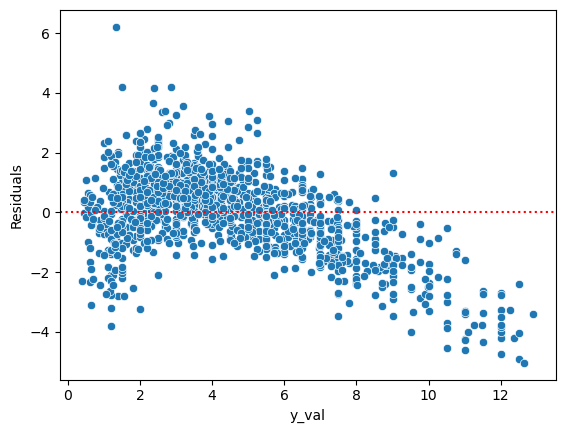

In [577]:
#Checking Homoscedasticity
sns.scatterplot(x=y_val_list,y=residuals)
plt.ylabel("Residuals")
plt.xlabel("y_val")
plt.axhline(y=0,color='r',linestyle=':')
plt.savefig("Plots/Homoscedasticity.png",bbox_inches="tight")
# There is a difference between variations in one part of 
#the data and the other

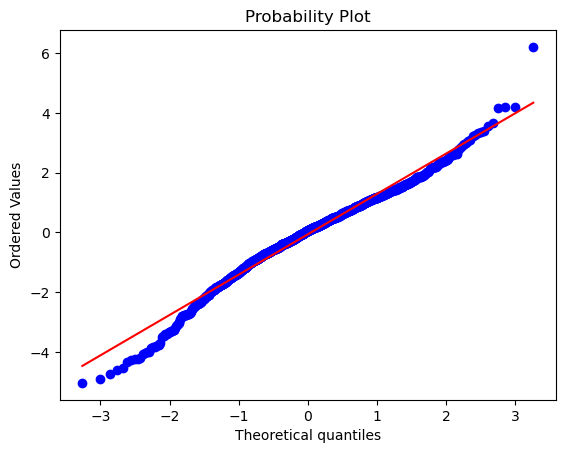

In [578]:
#Checking Normality
stats.probplot(residuals, dist="norm", plot=plt)
plt.savefig("Plots/Normality.png",bbox_inches="tight")
plt.show()

#distribution is normal since points lie approximately at 45 degree reference line

# Trying other regression models

In [579]:
def run_model(model,X_train,y_train,X_val,y_val):

    #Model fit
    model.fit(X_train,y_train)

    #Model predict
    preds=model.predict(X_val)
    rmse=np.sqrt(mean_squared_error(y_val,preds))
    mae=mean_absolute_error(y_val,preds)
    mape=mean_absolute_percentage_error(y_val,preds)*100
    r2 = r2_score(y_val,preds)
    print("MAE:{}".format(mae))
    print("RMSE:{}".format(rmse))
    print("Mean Absolute Percentage Error (MAPE):", mape)
    print("R² Score:", r2)

### Polynomial regression

In [580]:
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [581]:
# Define a pipeline
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),  # Add polynomial features
    ('regressor', LinearRegression())         # Linear regression model
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'poly_features__degree': [ 2, 3] # Polynomial degrees to try
}

# Perform GridSearchCV
grid = GridSearchCV(pipeline, param_grid)

In [582]:
run_model(grid,X_train,y_train,X_val,y_val)

MAE:0.820367961143256
RMSE:1.120011938485838
Mean Absolute Percentage Error (MAPE): 22.840118965908516
R² Score: 0.8120030153591228


In [583]:
grid.best_params_

{'poly_features__degree': 2}

### KNN regressor

In [584]:
from sklearn.neighbors import KNeighborsRegressor

In [585]:
knn=KNeighborsRegressor()
param_grid={"n_neighbors":[1,5,10]}
grid=GridSearchCV(knn,param_grid)

In [586]:
run_model(grid,X_train,y_train,X_val,y_val)

MAE:0.8291289433359935
RMSE:1.2006147007424885
Mean Absolute Percentage Error (MAPE): 23.355979298109578
R² Score: 0.7839705832980698


In [587]:
grid.best_params_

{'n_neighbors': 5}

In [588]:
#High variance with low k, higher k high bias

### Support Vector Regressor

In [589]:
from sklearn.svm import SVR

In [590]:
svr=SVR()
param_grid={"C":[1,10,100],"gamma":["auto","scale"]} #C is inversely proportional to reg. par.
grid=GridSearchCV(svr,param_grid)

In [591]:
run_model(grid,X_train,y_train,X_val,y_val)

MAE:0.7568113130726457
RMSE:1.0737523210460562
Mean Absolute Percentage Error (MAPE): 20.47403713812185
R² Score: 0.8272119072649902


In [592]:
grid.best_params_

{'C': 10, 'gamma': 'auto'}

### Random Forest Regression

In [593]:
from sklearn.ensemble import RandomForestRegressor

In [594]:
rfr=RandomForestRegressor(n_estimators=10)

In [595]:
run_model(rfr,X_train,y_train,X_val,y_val)

MAE:0.660584452068686
RMSE:0.9516127781312442
Mean Absolute Percentage Error (MAPE): 17.75262237289892
R² Score: 0.8642855441537293


### Gradient Boost Regressor

In [596]:
from sklearn.ensemble import GradientBoostingRegressor

In [597]:
gboost=GradientBoostingRegressor()

In [598]:
param_grid={"n_estimators":[50,100],"learning_rate":[0.1,0.2,0.3],"max_depth":[3,5]}

In [599]:
grid=GridSearchCV(gboost,param_grid,scoring='neg_mean_squared_error', cv=5)

In [600]:
run_model(grid,X_train,y_train,X_val,y_val)

MAE:0.6067127608648604
RMSE:0.8627945400894342
Mean Absolute Percentage Error (MAPE): 16.768086653560005
R² Score: 0.8884369558945631


In [601]:
grid.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}

### XGBoost

In [602]:
import xgboost as xgb

In [603]:
xg_reg = xgb.XGBRegressor()

In [604]:
param_grid={"n_estimators":[50,100],"learning_rate":[0.1,0.2,0.3],"max_depth":[3,5]} # Number of trees (boosting rounds), Step size shrinkage, Maximum depth of a tree
grid=GridSearchCV(xg_reg,param_grid, scoring='neg_mean_squared_error', cv=5)

In [605]:
run_model(grid,X_train,y_train,X_val,y_val)

MAE:0.6110303072552697
RMSE:0.8887762978961898
Mean Absolute Percentage Error (MAPE): 16.84229882107585
R² Score: 0.8816166820015026


In [606]:
grid.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100}

### PCA

In [607]:
from sklearn.decomposition import PCA

##### LinearRegression

In [608]:
# Create the pipeline with make_pipeline
pipeline = make_pipeline(
PCA(),         # Reduces dimensionality to 5 components
LinearRegression()
)

In [609]:
# Define parameter grid for GridSearchCV
param_grid = {
    'pca__n_components': [3,4,5,6, 7,8,9, 10]
}

In [610]:
# Set up GridSearchCV with make_pipeline
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=5)

In [611]:
# Fit GridSearchCV
run_model(grid_search,X_train,y_train,X_val,y_val)

MAE:1.0374401943995764
RMSE:1.367526572103419
Mean Absolute Percentage Error (MAPE): 33.35944654535673
R² Score: 0.7197296685434961


In [612]:
grid_search.best_params_

{'pca__n_components': 9}

In [613]:
#Explained Variance Ratio
best_pca = grid_search.best_estimator_.named_steps['pca']
explained_variance_ratio = best_pca.explained_variance_ratio_

print("\nExplained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f}")


Explained Variance Ratio:
Principal Component 1: 0.2799
Principal Component 2: 0.1591
Principal Component 3: 0.1207
Principal Component 4: 0.1086
Principal Component 5: 0.0877
Principal Component 6: 0.0802
Principal Component 7: 0.0535
Principal Component 8: 0.0461
Principal Component 9: 0.0336


In [614]:
#97% of variance described by 9 principal components
explained_variance_ratio.sum()


0.9693357969819556

# Evaluating XGBoost the best model on the test set

In [615]:
y_test_pred=grid.predict(X_test)

In [616]:
rmse_best=np.sqrt(mean_squared_error(y_test,y_test_pred))
mae_best=mean_absolute_error(y_test,y_test_pred)
mape_best=mean_absolute_percentage_error(y_test,y_test_pred)*100
r2_best = r2_score(y_test,y_test_pred)
print("MAE:{}".format(mae_best))
print("RMSE:{}".format(rmse_best))
print("Mean Absolute Percentage Error (MAPE):", mape_best)
print("R² Score:", r2_best)

MAE:0.5992548535599321
RMSE:0.8569772564149004
Mean Absolute Percentage Error (MAPE): 15.672826792697123
R² Score: 0.8825394347355636


# Visualizations with SHAP

In [617]:
#SHAP values (SHapley Additive exPlanations) is a method based on cooperative game theory
#SHAP shows the contribution or the importance of each feature on the prediction of the model
import shap

In [618]:
feature_names=df.drop("selling_price",axis=1).columns

In [619]:
feature_names

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'fuel_Petrol',
       'seller_type_Individual', 'transmission_Manual', 'owner_Second Owner',
       'owner_Third and above owners', 'seat_category_more than 5'],
      dtype='object')

In [620]:
X_test_df = pd.DataFrame(X_test, columns=feature_names)

In [621]:
# Fits the explainer
explainer = shap.Explainer(grid.predict,X_test_df)

In [622]:
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test_df)

PermutationExplainer explainer: 1255it [04:22,  4.58it/s]                                                              


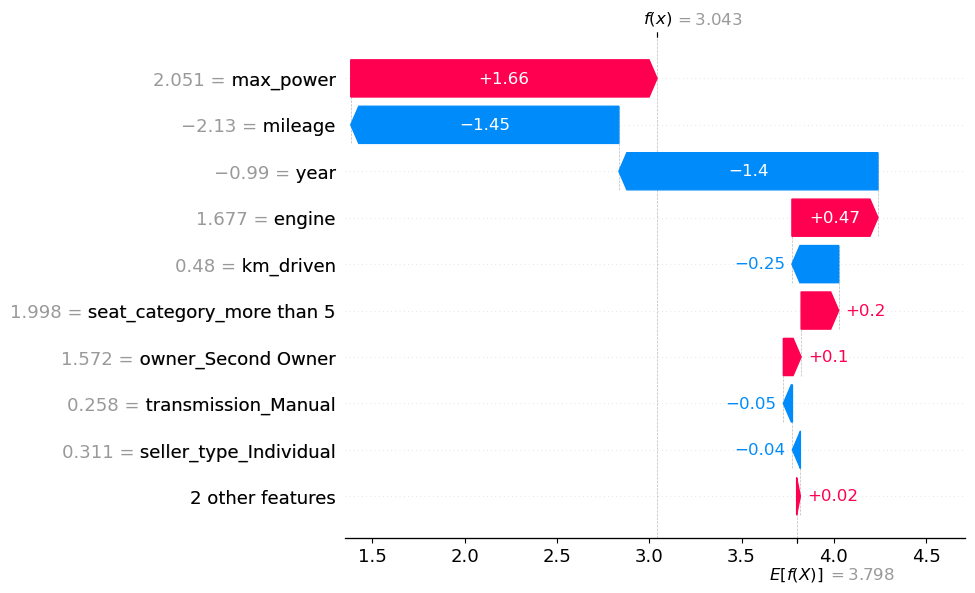

In [623]:
shap.plots.waterfall(shap_values[6])
#shap.plots.waterfall(shap_values[1],show=False)
#plt.savefig("Plots/Waterfall_onerow.png",bbox_inches="tight")

In [624]:
#x-axis has the values of car sales price. x is the chosen observation,
#f(x) is the predicted value of the model, given input x and E[f(x)] is the the mean of all predictions
#The SHAP value for each feature in this observation is given by the length of the bar
#The sum of all SHAP values will be equal to E[f(x)] — f(x).

#### Bar plot

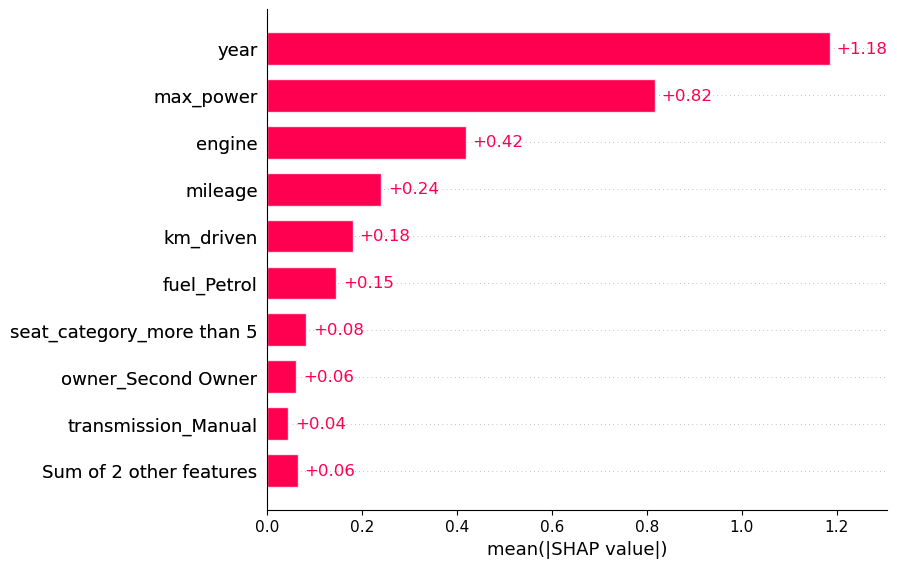

In [625]:
shap.plots.bar(shap_values)
#shap.plots.bar(shap_values,show=False)
#plt.savefig("Plots/Feature_shapvalues.png",bbox_inches="tight")
#Here the features are ordered from the highest to the lowest effect on the prediction. It takes in account the absolute SHAP value.

In [626]:
# Here the features are ordered from the highest to the lowest effect on the prediction.
#It takes in account the absolute SHAP value, so it does not matter if the feature affects the prediction in a positive or negative way.

#### Summary plot: violin

In [627]:
#shap.plots.beeswarm(shap_values)

In [628]:
#The features are ordered by their effect on prediction, 
#We can see how higher and lower values of the feature will affect the result.

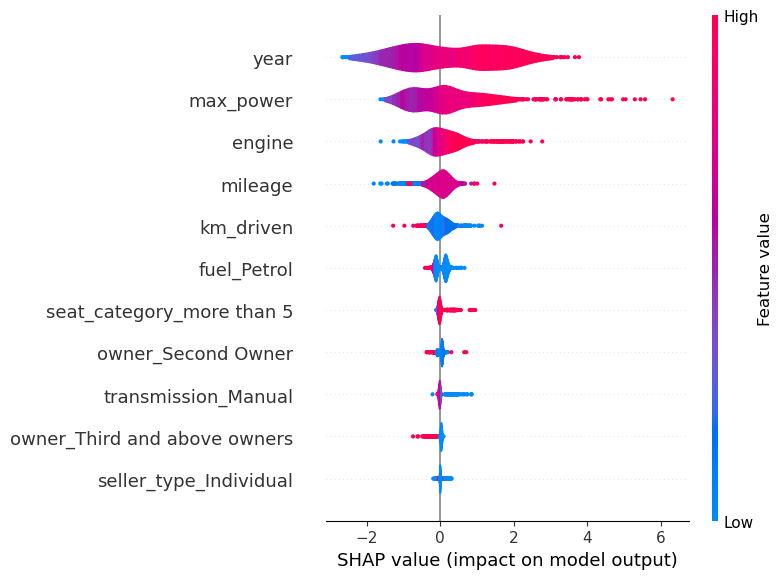

In [629]:
shap.summary_plot(shap_values, plot_type='violin',show=False)
#plt.savefig("Plots/Feature_shapvalues_violin.png")